In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame, ExcelWriter
import xlrd
%matplotlib inline

In [76]:
file_path = 'D:\IFHO.xlsx'

In [77]:
data = pd.read_excel(file_path,sheetname='Data_1',skiprows=[0,2])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7031 entries, 0 to 7030
Data columns (total 18 columns):
PLMN Name                      7031 non-null object
Source RNC Name                7031 non-null object
Source WBTS Name               7031 non-null object
Source WCEL Name               7031 non-null object
Source WCEL adjacencies [#]    7031 non-null int64
Source WCEL LCR ID             7031 non-null int64
Source WCEL ID                 7031 non-null int64
Target RNC Name                7031 non-null object
Target WBTS Name               7031 non-null object
Target WCEL Name               7031 non-null object
Target WCEL LCR ID             7031 non-null int64
Target WCEL ID                 7031 non-null int64
Neighbor                       7031 non-null object
Att                            7031 non-null int64
Share [%]                      7031 non-null float64
SR per adjacency               7031 non-null float64
Avg CPICH Ec/No                7027 non-null float64
Avg CPICH RS

In [78]:
data['Source_WBTS'] = Series([x[0:6] for x in data['Source WCEL Name']])
data['Target_WBTS'] = Series([x[0:6] for x in data['Target WCEL Name']])

In [79]:
data.Source_WBTS.unique()

array([u'ENOGOY', u'EURDIC', u'WGYSRM', u'EPBARR', u'HRAERO', u'HRBRNQ',
       u'HRCAPM', u'HRFONT', u'HRLIGU', u'HRPQ2F', u'HRRNGR', u'HRTRFD',
       u'HRWALL', u'HRSGLK', u'HRSCTL'], dtype=object)

In [85]:
a = data[(data.Neighbor == 'Yes') & (data.Source_WBTS == data.Target_WBTS)]
missingCositeNeighbour = data[(data.Neighbor == 'No ') & (data.Source_WBTS == data.Target_WBTS)]

50 Missing Co-Site Relations


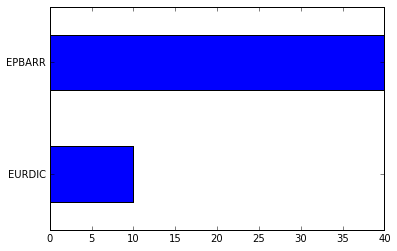

In [109]:
#missingCositeNeighbour.to_excel('Co-Site_Missing_relations.xls')
print '%s Missing Co-Site Relations' %len(missingCositeNeighbour)
missingCositeNeighbour.Source_WBTS.value_counts(ascending=True).plot(kind='barh')